In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [8]:
#Importing the First dataset
df = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'])
df.set_index('dt', inplace=True)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


C:\Users\AMMAR\AppData\Local\Temp\ipykernel_6548\1691160968.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = numeric_df.resample("Y").mean()


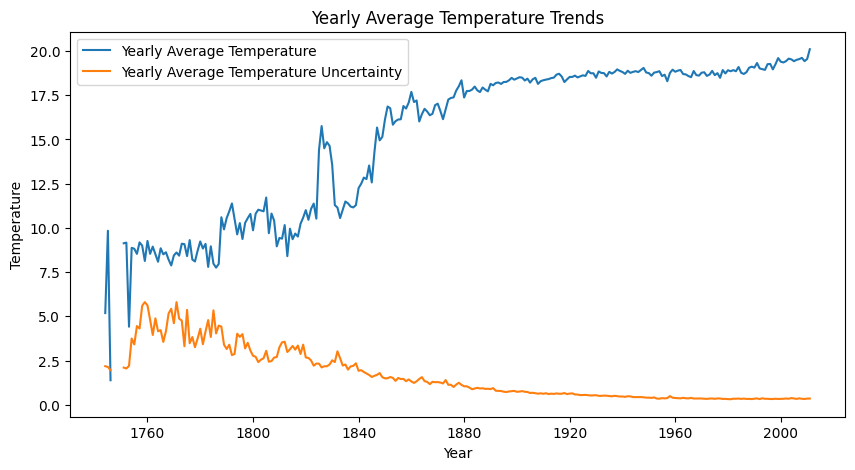

In [3]:
# Select only the numeric columns for resampling
numeric_df = df.select_dtypes(include=[np.number])

# Resample the data yearly and calculate the mean
df_yearly = numeric_df.resample("Y").mean()

# Plot the yearly data
plt.figure(figsize=(10, 5))
plt.plot(df_yearly.index, df_yearly["AverageTemperature"], label="Yearly Average Temperature")
plt.plot(df_yearly.index, df_yearly["AverageTemperatureUncertainty"], label="Yearly Average Temperature Uncertainty")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Yearly Average Temperature Trends")
plt.legend()
plt.show()

C:\Users\AMMAR\AppData\Local\Temp\ipykernel_6548\960477017.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  missing_yearly = df["missing"].resample("Y").sum()


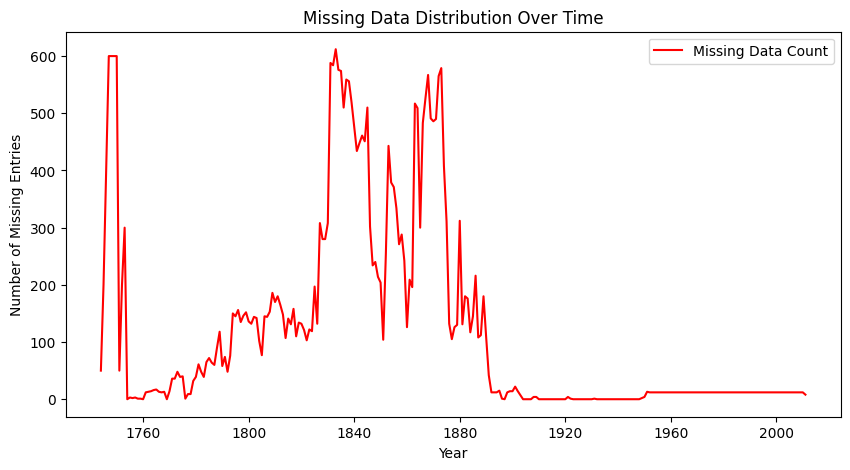

In [6]:
# Add a column to mark missing values
df["missing"] = df["AverageTemperature"].isnull()

# Resample to yearly and sum the missing counts
missing_yearly = df["missing"].resample("Y").sum()

# Plot the missing data
plt.figure(figsize=(10, 5))
plt.plot(missing_yearly.index, missing_yearly, label="Missing Data Count", color="red")
plt.xlabel("Year")
plt.ylabel("Number of Missing Entries")
plt.title("Missing Data Distribution Over Time")
plt.legend()
plt.show()

df.drop(columns=["missing"], inplace=True)
del(missing_yearly)